In [1]:
# Author Emmanuel Sedicol
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2

from IPython.display import clear_output
DEBUG = False

## Image to Compare:
> - this functon loads the image that will be used as a comparasion to input video
> - image is resized and altered so that is has the same dimensions as our currents frames

In [2]:
def image_to_compare():
    image_to_compare = cv2.imread("images/compare_image.png")
    image_to_compare = cv2.resize(image_to_compare, (600,400))
    image_to_compare = cv2.cvtColor(image_to_compare, cv2.COLOR_BGR2GRAY)
    image_to_compare = image_to_compare[int(80):int(130),int(280):int(325)] 

    return image_to_compare

image_to_compare = image_to_compare()

## Compare Image:
> - SSIM is a Structural similarity (SSIM) methid which uses a calculated index for measuring image quality
> - scikit-learn offers a method for it.. yay

In [3]:
def compare_images(imageA, imageB):
    ssim = measure.compare_ssim(imageA, imageB)
    return ssim

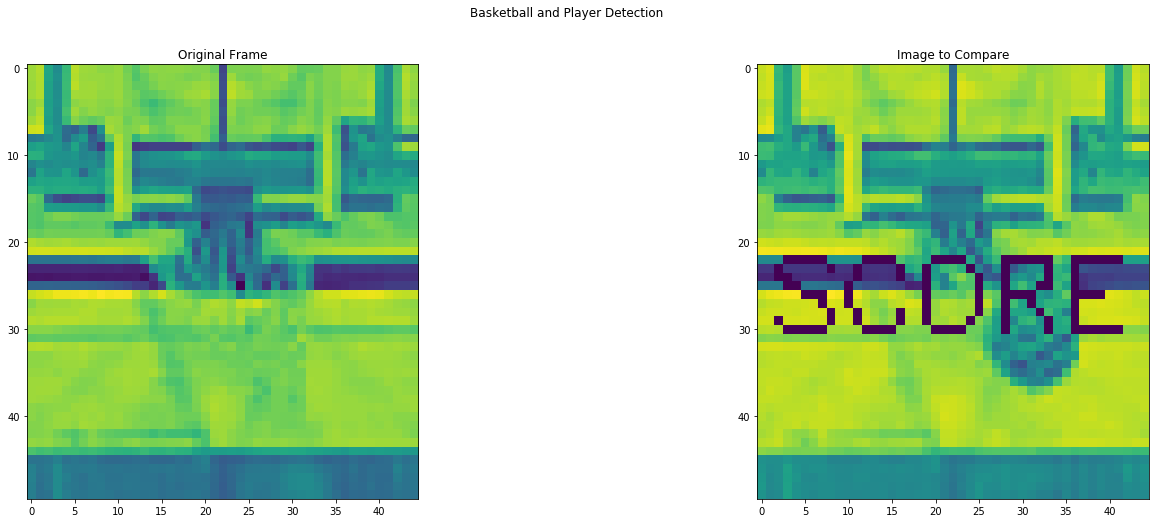

In [4]:
path = "VIDEOS/MAIN_TEST_SHORT.mov"
vs = cv2.VideoCapture(path)

if DEBUG:
    while True:
        # grab the current frame
        _,frame = vs.read()

        # break out of the application if we have no more frames to read
        if frame is None:
            break

        # resize frame so to make its constant size througout
        frame = cv2.resize(frame,(600, 400))

        f_copy = frame[int(80):int(130),int(280):int(325)] 
        f_copy = cv2.cvtColor(f_copy, cv2.COLOR_BGR2GRAY)

        ssim = compare_images(f_copy, image_to_compare)

        if ssim > 0.92:
            print("score")
            cv2.putText(f_copy, "SCORE", (int(1), int(30)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (2, 255, 255), 1 )
            cv2.putText(image_to_compare, "SCORE", (int(1), int(30)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (2, 255, 255), 1 )

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
        fig.suptitle('Basketball and Player Detection')

        # Column one
        ax1.set_title("Original Frame")
        ax1.imshow(f_copy) 

        # Column 2
        ax2.set_title("Image to Compare")
        ax2.imshow(image_to_compare)

        plt.show()
        clear_output(wait=True)
    vs.release()